<h1> "Momentum" Trading Stratergy </h1>
<ul>
    <li> Information on the strategy and steps followed for developing the strategy: </li>
        <ol>
        <li> Momentum strategy may be an ill-defined term and can mean a lot of different things. </li>
        <li> But what we will be looking for is a security or securities that are moving in a specific direction. </li>
                <li> We will screen and take into consideration securities that are above thier 50-day moving average. </li>
        <li> Momentum Trading Strategy can be considered as a <b> trend following stratergy </b>.</li>
                <li> We can make money as the security moves up and as it moves down. </li>
        <li> Research on some trading signals that may be profitable before we start using them in the stratergy. </li>
        <li> Also, we would want to to generalize the signals to a number of securities. </li>
        </ol>
</ul>

In [17]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as fin
from matplotlib import rcParams
import datetime as dt

<h3> 1. Download Data </h3>
<ul>
    <li> Typically trading "systems" involve a number of securities. </li>
    <li> In this stratergy I will be using GLD --> the gold ETF. </li>
</ul>

In [45]:
start_date = dt.datetime(2012,5,18)
end_date = dt.datetime(2023,1,10)
gold = fin.Ticker('GLD')
gold_hist = pd.DataFrame(gold.history(start = start_date, end = end_date))

In [46]:
gold_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2012-05-18 00:00:00-04:00,154.460007,155.130005,153.970001,154.550003,12994200,0.0,0.0,0.0
2012-05-21 00:00:00-04:00,154.110001,154.949997,153.860001,154.649994,7542400,0.0,0.0,0.0
2012-05-22 00:00:00-04:00,153.589996,154.419998,151.550003,152.080002,11302700,0.0,0.0,0.0
2012-05-23 00:00:00-04:00,151.500000,151.839996,148.839996,151.619995,18854500,0.0,0.0,0.0
2012-05-24 00:00:00-04:00,152.710007,152.910004,150.619995,151.410004,9697100,0.0,0.0,0.0


In [47]:
Day = np.arange(1, len(gold_hist)+1)
gold_hist['Day'] = Day
gold_hist.drop(columns = ['Volume', 'Dividends', 'Stock Splits', 'Capital Gains'], inplace = True)
gold_hist = gold_hist[['Day', 'Open', 'High', 'Low', 'Close']]

In [48]:
gold_hist.head()

,Day,Open,High,Low,Close
Date,,,,,
2012-05-18 00:00:00-04:00,1,154.460007,155.130005,153.970001,154.550003
2012-05-21 00:00:00-04:00,2,154.110001,154.949997,153.860001,154.649994
2012-05-22 00:00:00-04:00,3,153.589996,154.419998,151.550003,152.080002
2012-05-23 00:00:00-04:00,4,151.500000,151.839996,148.839996,151.619995
2012-05-24 00:00:00-04:00,5,152.710007,152.910004,150.619995,151.410004


In [49]:
gold_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2678 entries, 2012-05-18 00:00:00-04:00 to 2023-01-09 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     2678 non-null   int32  
 1   Open    2678 non-null   float64
 2   High    2678 non-null   float64
 3   Low     2678 non-null   float64
 4   Close   2678 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 115.1 KB


<h3> 2. Add data/transform data </h3>
<ul>
    <li> Calculate signal based on some price or statistical acion </li>
    <li> I will be using a moving average crossover to generate signals </li>
    <li> For this stratergy I will always be "in" a trade, either long or short </li>
    <li> This is just a model; this means in real life variation should be expected </li>
</ul>
<ol> 
    <li> The way I have set up this strategy is that I enter the trade when the fast moving average (9-day MA) crosses the slow one (21-day MA); and exit and go short when the fast one goes under the slow one. </li>
    <li> In this strategy I always remain in a trade either long or short. </li> 
</ol>

<h5> Add moving averages to the data frame </h5>

<li> Adding the fast-moving average </li>

In [50]:
gold_hist['9-Day'] = gold_hist['Close'].rolling(9).mean()

<li> Adding the slow-moving average </li>

In [52]:
gold_hist['21-Day'] = gold_hist['Close'].rolling(21).mean()

In [54]:
gold_hist[0:21]

,Day,Open,High,Low,Close,9-Day,21-Day
Date,,,,,,,
2012-05-18 00:00:00-04:00,1,154.460007,155.130005,153.970001,154.550003,NaN,NaN
2012-05-21 00:00:00-04:00,2,154.110001,154.949997,153.860001,154.649994,NaN,NaN
2012-05-22 00:00:00-04:00,3,153.589996,154.419998,151.550003,152.080002,NaN,NaN
2012-05-23 00:00:00-04:00,4,151.500000,151.839996,148.839996,151.619995,NaN,NaN
2012-05-24 00:00:00-04:00,5,152.710007,152.910004,150.619995,151.410004,NaN,NaN
2012-05-25 00:00:00-04:00,6,151.889999,152.850006,151.630005,152.679993,NaN,NaN
2012-05-29 00:00:00-04:00,7,153.470001,153.619995,150.250000,151.020004,NaN,NaN
2012-05-30 00:00:00-04:00,8,149.740005,152.380005,148.529999,151.910004,NaN,NaN
2012-05-31 00:00:00-04:00,9,152.029999,152.710007,150.619995,151.619995,152.393333,NaN


In [56]:
gold_hist[19:25]

,Day,Open,High,Low,Close,9-Day,21-Day
Date,,,,,,,
2012-06-15 00:00:00-04:00,20,157.750000,158.460007,157.419998,157.839996,156.456667,NaN
2012-06-18 00:00:00-04:00,21,157.460007,158.210007,156.539993,157.929993,156.544444,154.876190
2012-06-19 00:00:00-04:00,22,158.000000,158.139999,156.970001,157.160004,156.538888,155.000476
2012-06-20 00:00:00-04:00,23,156.000000,157.369995,154.259995,155.970001,156.702221,155.063333
2012-06-21 00:00:00-04:00,24,153.729996,154.229996,151.800003,152.020004,156.401111,155.060476
2012-06-22 00:00:00-04:00,25,152.039993,152.699997,151.210007,152.639999,156.098889,155.109048


<li> We see that there is a "NaN" value on the 19th day. </li>
<li> We have a look ahead information to calcualte the moving average on closing price for 21-days. </li>
<li> We will have to wait for the market to close on the 21st day to do the calculations. </li>
<li> The way the calculations in our table are set up they imply that we know the closing price as the day starts. </li>
<li> Hence, we roll the the moving averages forward by a day. </li>

In [57]:
gold_hist['9-Day'] = gold_hist['Close'].rolling(9).mean().shift()
gold_hist['21-Day'] = gold_hist['Close'].rolling(21).mean().shift()

In [58]:
gold_hist[0:30]

,Day,Open,High,Low,Close,9-Day,21-Day
Date,,,,,,,
2012-05-18 00:00:00-04:00,1,154.460007,155.130005,153.970001,154.550003,NaN,NaN
2012-05-21 00:00:00-04:00,2,154.110001,154.949997,153.860001,154.649994,NaN,NaN
2012-05-22 00:00:00-04:00,3,153.589996,154.419998,151.550003,152.080002,NaN,NaN
2012-05-23 00:00:00-04:00,4,151.500000,151.839996,148.839996,151.619995,NaN,NaN
2012-05-24 00:00:00-04:00,5,152.710007,152.910004,150.619995,151.410004,NaN,NaN
2012-05-25 00:00:00-04:00,6,151.889999,152.850006,151.630005,152.679993,NaN,NaN
2012-05-29 00:00:00-04:00,7,153.470001,153.619995,150.250000,151.020004,NaN,NaN
2012-05-30 00:00:00-04:00,8,149.740005,152.380005,148.529999,151.910004,NaN,NaN
2012-05-31 00:00:00-04:00,9,152.029999,152.710007,150.619995,151.619995,NaN,NaN


In [64]:
gold_hist[19:25]

,Day,Open,High,Low,Close,9-Day,21-Day,Signal
Date,,,,,,,,
2012-07-17 00:00:00-04:00,41,154.009995,154.500000,152.449997,153.470001,154.107778,154.336666,-1
2012-07-18 00:00:00-04:00,42,152.669998,153.600006,152.399994,153.050003,153.664444,154.128571,-1
2012-07-19 00:00:00-04:00,43,153.729996,154.320007,152.929993,153.380005,153.372223,153.896191,-1
2012-07-20 00:00:00-04:00,44,152.970001,154.000000,152.750000,153.669998,153.335556,153.716191,-1
2012-07-23 00:00:00-04:00,45,152.500000,153.330002,152.289993,153.029999,153.294445,153.606667,-1
2012-07-24 00:00:00-04:00,46,153.630005,153.800003,152.199997,153.520004,153.392224,153.654762,-1


<h5> Adding a "Signal" column </h5>
<ul>
    <li> This column will tell us when we are in a trade "long" and when we are in a trade "short". </li>
</ul>

<li> For a <i>long</i> position we will have the "Signal" column show 1 and for a <i>short</i> position we will have it show -1. </li>

In [66]:
gold_hist['Signal'] = np.where(gold_hist['9-Day']>gold_hist['21-Day'], 1, 0) #in a long trade
# if we are in a short trade show '-1' else show whatever was there already
gold_hist['Signal'] = np.where(gold_hist['9-Day']<gold_hist['21-Day'], -1, gold_hist['Signal']) #in a short trade
gold_hist.dropna(inplace = True)

In [41]:
gold_hist['Returns'] = np.log(gold_hist['Close']).diff()
gold_hist['System_Return'] = gold_hist['Signal'] * gold_hist['Returns']
gold_hist['Entry'] = gold_hist.Signal.diff()
gold_hist.head()

,Day,Open,High,Low,Close,9-Day,21-Day,Signal,Returns,System_Return,Entry
Date,,,,,,,,,,,
2012-06-20 00:00:00-04:00,23,156.000000,157.369995,154.259995,155.970001,156.538888,155.000476,1,NaN,NaN,NaN
2012-06-21 00:00:00-04:00,24,153.729996,154.229996,151.800003,152.020004,156.702221,155.063333,1,-0.025652,-0.025652,0.0
2012-06-22 00:00:00-04:00,25,152.039993,152.699997,151.210007,152.639999,156.401111,155.060476,1,0.004070,0.004070,0.0
2012-06-25 00:00:00-04:00,26,152.580002,154.160004,152.250000,153.759995,156.098889,155.109048,1,0.007311,0.007311,0.0
2012-06-26 00:00:00-04:00,27,153.029999,153.300003,152.130005,152.619995,155.798887,155.220952,1,-0.007442,-0.007442,0.0


<h5> Plot Trades on Time Series </h5>

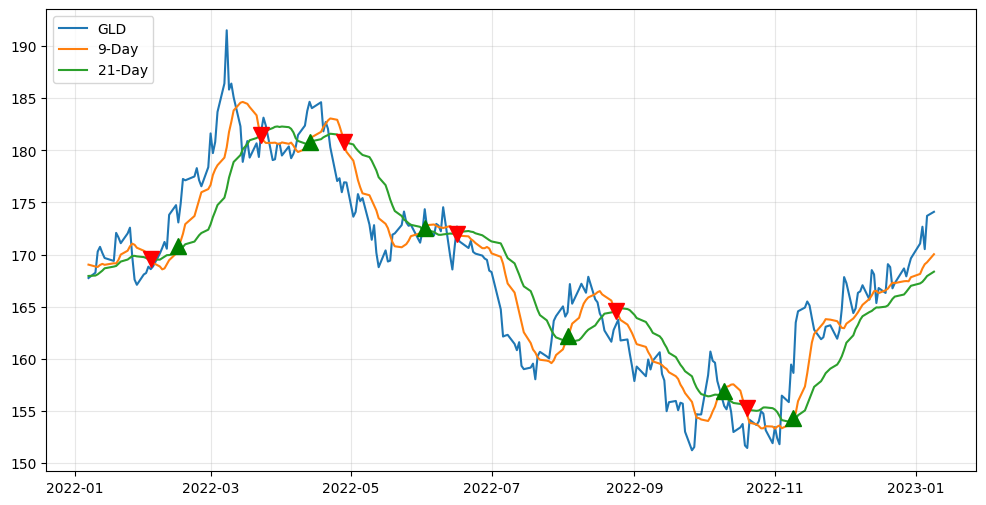

In [34]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gold_hist.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gold_hist.iloc[-252:]['9-Day'], label = '9-Day')
plt.plot(gold_hist.iloc[-252:]['21-Day'], label = '21-Day')
plt.plot(gold_hist.iloc[-252:].loc[gold_hist.Entry == 2].index, gold_hist[-252:]['9-Day'][gold_hist.Entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gold_hist.iloc[-252:].loc[gold_hist.Entry == -2].index, gold_hist[-252:]['21-Day'][gold_hist.Entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);